In [1]:
import pandas as pd

In [2]:
#Reading the data into pandas dataframe with 2 columns label and message
messages = pd.read_csv('C:/Users/deepa_atj5xcu/Documents/FRANKFURT UNIVERISTY OF APPLIED SCIENCES/Work/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#perfoming Exploratory Data Analysis
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
#adding a new column called length for each message in dataframe
messages['length']=messages['message'].apply(len)

In [6]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

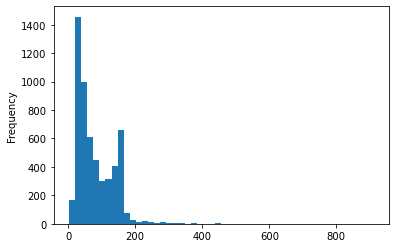

In [9]:
messages['length'].plot(bins=50,kind='hist')

#from the histogram we could figure out that the lenght of each messages lies around 0 to 200

In [10]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

gives us an idea that the max length is 910 and min lenght of the msg is 2

In [11]:
#printing the longest message
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#trying to figure out if the feature length is a distinguishing feature between ham and spam

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

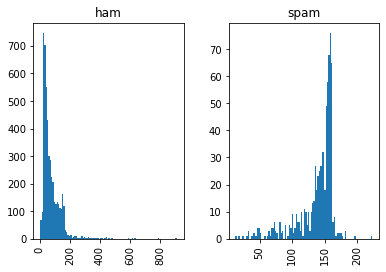

In [13]:
messages.hist(column='length',by='label',bins=100)

ham's messages length is smaller compared to spam

classification algo requires numerical feature to classify, therefore we use bagofwords approach to convert the data into vector where each unique word in a text will be represented by one number

convert the raw messages (sequence of characters) into vectors (sequences of numbers).

using nltk for text preprocessing


text preprocessing 
step1: remove punctuation

In [18]:
import string

mess="listen: the message has punctuation!"

#checking if each character is a letter or punctuation
nopunc=[char for char in mess if char not in string.punctuation]

In [19]:
print(nopunc)

['l', 'i', 's', 't', 'e', 'n', ' ', 't', 'h', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


#joining these letters as soon as space occurs.

In [20]:
nopunc=''.join(nopunc)

In [21]:
print(nopunc)

listen the message has punctuation


step2: removing stopwords

In [22]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] #to show some stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
#making a list of words
nopunc.split()

['listen', 'the', 'message', 'has', 'punctuation']

In [24]:
#removing stopwords from the list of words
clean_mes=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
clean_mes

['listen', 'message', 'punctuation']

making a function to pre-precoss the text (adding the 2 steps, remove punc and stopwords)

In [26]:
def text_process(mess):
        """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
        
        nopunc=[char for char in mess if char not in string.punctuation]
        nopunc=''.join(nopunc)
        return[word for word in nopunc.split() if word not in stopwords.words('english')]

Tockenising the messages into list of tokens(words) by applying the text pre-processing fucntion 

In [27]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

#now we have list of tokens
performing vectorization, which means we have to convert list of tokens into vector that the model understands.
we use bag-of-words approcah for vectorization.

peforming it in 3 steps:
1. count how many times does a word occur in each message (term frequency)
for this we use Countvectorizer from Scikit learn library

Countvectorizer will create a sparse matrix conatining each word in every column and its count in each message in row.




In [28]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer= CountVectorizer(analyzer=text_process).fit(messages['message'])

In [29]:
print(len(bow_transformer.vocabulary_))

11617


In [30]:
#trying to create a sprase matrix for message 4
mess1=messages['message'][3]
print(mess1)

U dun say so early hor... U c already then say...


In [31]:
mess1_bow=bow_transformer.transform([mess1])
print(mess1_bow)
print(mess1_bow.shape)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2
(1, 11617)


the output tells we have 7 unique words in the message , 2 of it appear twice and rest all once.

In [32]:
#now performing it for entire dataframe
messages_bow=bow_transformer.transform(messages['message'])

In [33]:
print('shape of sparse matrix:',messages_bow.shape)

shape of sparse matrix: (5572, 11617)


#now counting is done

term weighting and normalization is done using TF-IDF using scikit-learns tfidfTransformer

tf-idf --> term frequency- inverse document frequency
it gives a weight which tells how impotant a word is to a document.
the importance value increases as the number of times the word appears in a document vs number of times the word appears in collection of document.

this value is used for scoring and ranking a document's relevance given a user query

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(messages_bow)


In [35]:
#eaxmple trying tfidf to get weight of each word for message 4
tfidf4=tfidf_transformer.transform(mess1_bow)

In [36]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [37]:
#calculating the weights of each word using tfidfTransformer
#passing sparse matrix of word count to it
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)


(5572, 11617)


Finally we got weights of each word

In [ ]:
Training the model

Using the messages represented as vectors, we train our model.

we can use any classifier, here we use Naive Bayes classifier

In [38]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [39]:
#checjing for a message
print('predicted',spam_detect_model.predict(tfidf4)[0])
print('expected',messages.label[3])

predicted ham
expected ham


In [40]:
#performing the predictions for all messages
all_pred=spam_detect_model.predict(messages_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [41]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



splitting the data


In [42]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [44]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001DDE9B00B80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [45]:
predictions = pipeline.predict(msg_test)

In [46]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1018
        spam       0.68      1.00      0.81        97

    accuracy                           0.96      1115
   macro avg       0.84      0.98      0.89      1115
weighted avg       0.97      0.96      0.96      1115

